# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Load Dataset

In [2]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\Employee.csv")
df.head(5)

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                   2.0   
1              Poor             High                Low                   3.0   
2              Good             High                Low                   0.0   
3              Good             High               High                   1.0   
4              Fair        Very High            Average                   0.0   

   ... Number of Dependents  Job Level Company Size Company Tenure  \
0  ...                  0.0        Mid       Medium             89   
1  ...                  3.0        Mid       Medium             21   
2  ...                  3.0        Mid       Medium             74   
3  ...                  2.0        Mid        Small             50   
4  ...                  0.0     Senior       Medium             68   

   Remote Work Leadership Opportunities Innovation Opportunities  \
0           No                       No                       No   
1           No                       No                       No   
2           No                       No                       No   
3          Yes                       No                       No   
4           No                       No                       No   

   Company Reputation Employee Recognition Attrition  
0           Excellent               Medium    Stayed  
1                Fair                  Low    Stayed  
2                Poor                  Low    Stayed  
3                Good               Medium    Stayed  
4                Fair               Medium    Stayed  

[5 rows x 24 columns]

this code reads the csv file into a pandas DataFrame and then displays the first 5 rows of that DataFrame. 

# EDA

In [3]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

# Univariate Analysis

1. Summary Statistics for Numerical Variables

In [4]:
df.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74498.000000  74498.000000      74498.000000    74498.000000   
mean   37249.500000     38.529746         15.721603     7299.379514   
std    21505.864514     12.083456         11.223744     2152.508566   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18625.250000     28.000000          7.000000     5652.000000   
50%    37249.500000     39.000000         13.000000     7348.000000   
75%    55873.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    16149.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74493.000000        74498.000000          74492.000000   
mean               0.832978           49.991584              1.650365   
std                0.995303           28.513611              1.553660   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000              6.000000   

       Company Tenure  
count    74498.000000  
mean        55.727456  
std         25.399349  
min          2.000000  
25%         36.000000  
50%         56.000000  
75%         76.000000  
max        128.000000

2. Histograms for Numerical Variables

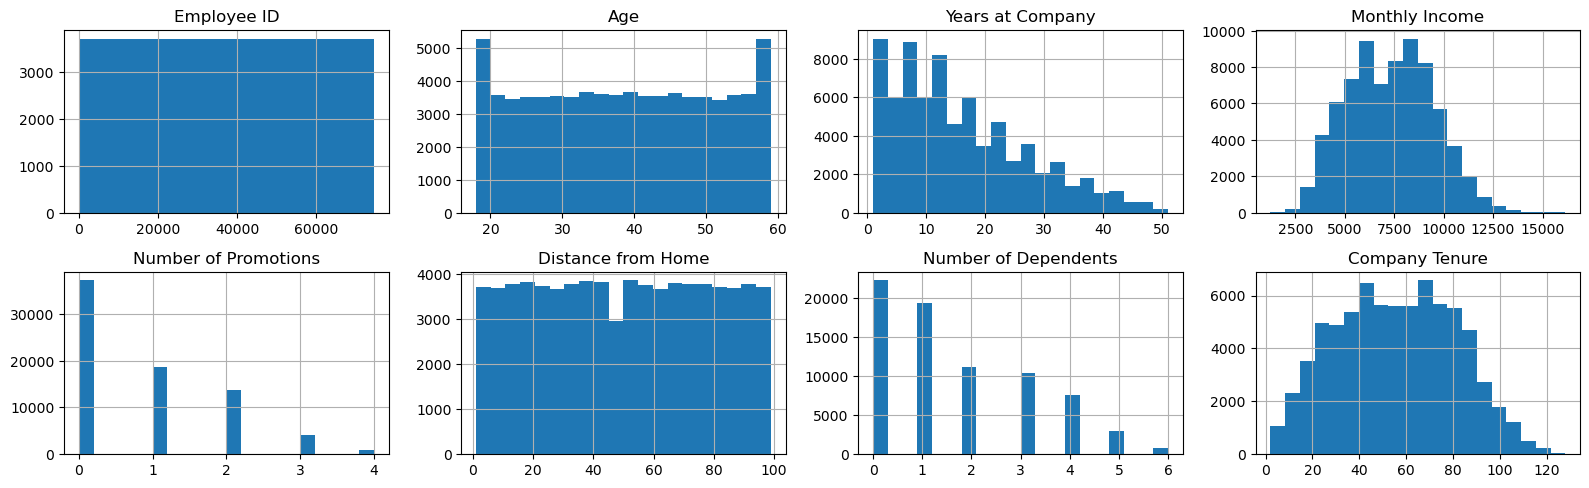

In [5]:
num_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(16, 12))
for i, feature in enumerate(num_features):
    plt.subplot(5, 4, i+1)
    df[feature].hist(bins=20)
    plt.title(feature)
plt.tight_layout()
plt.show()

3. Boxplots for Numerical Variables

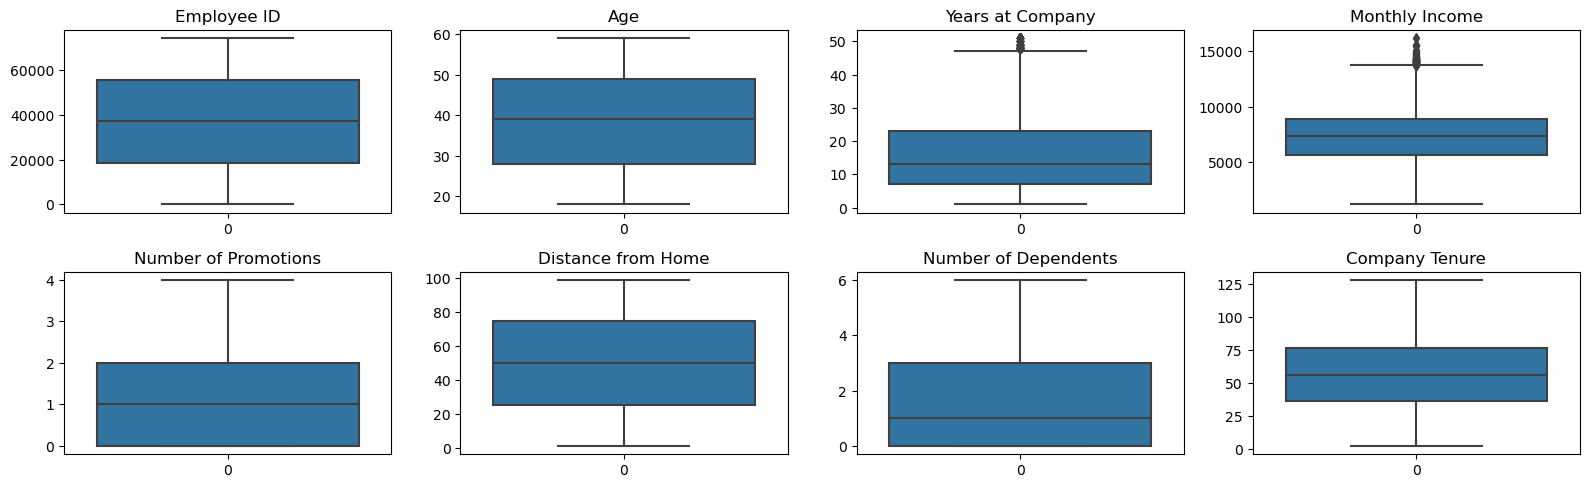

In [6]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(num_features):
    plt.subplot(5, 4, i+1)
    sns.boxplot(data=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

4. Count Plots for Categorical Variables

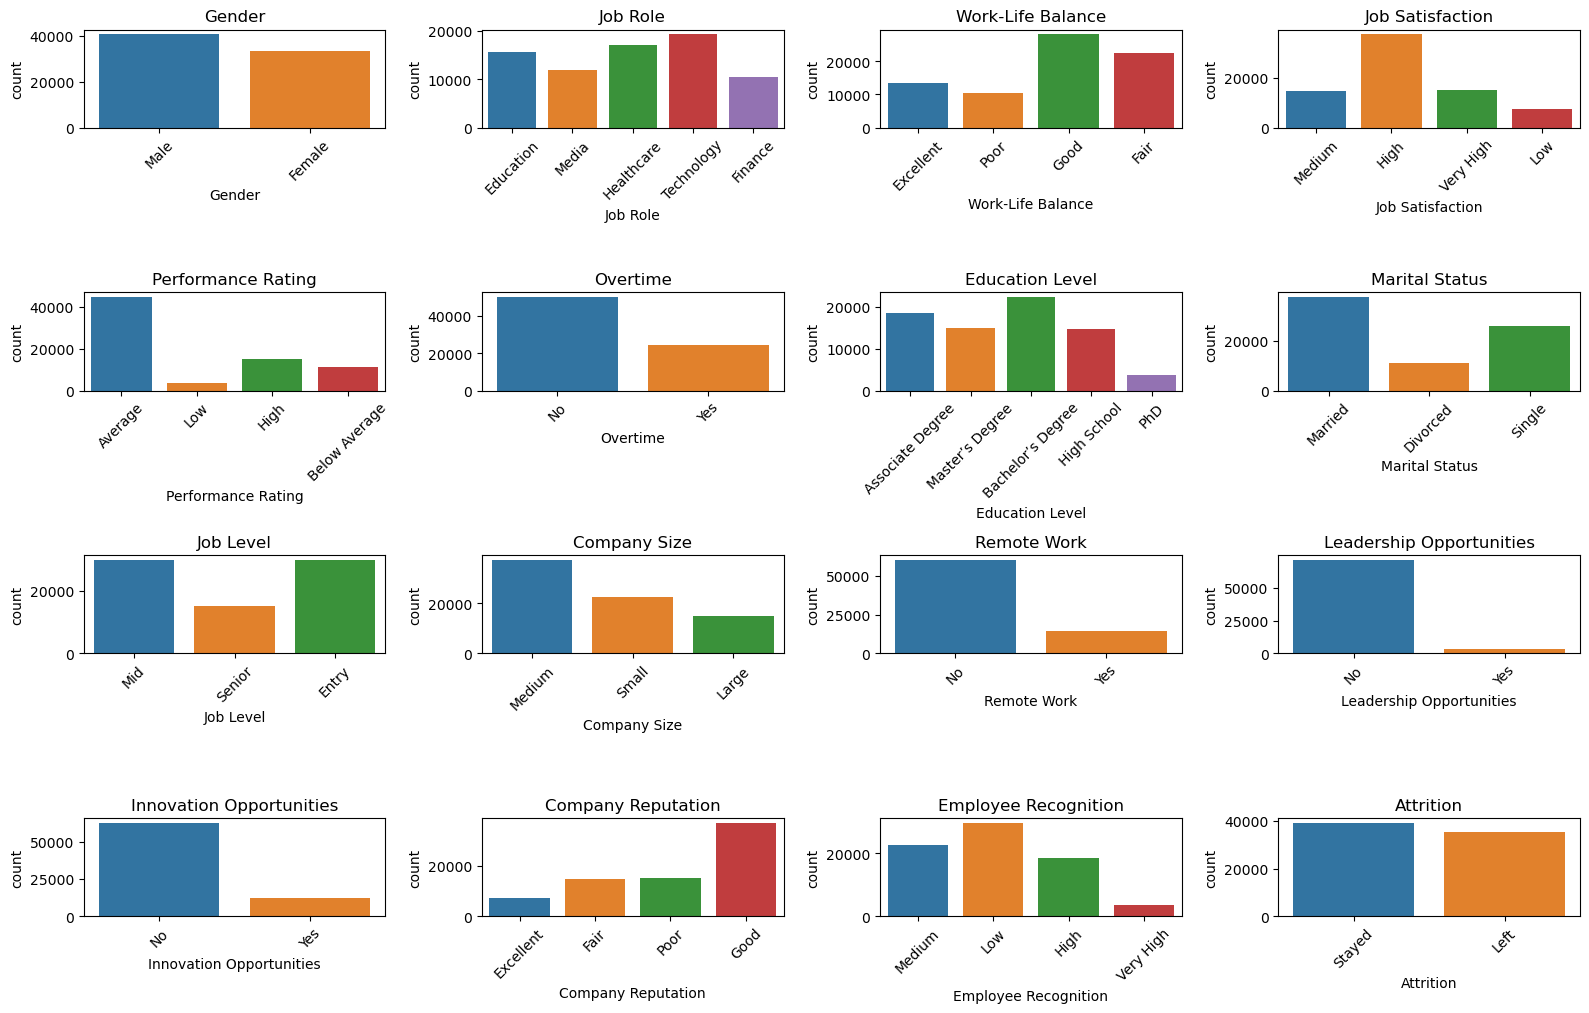

In [7]:
cat_features = df.select_dtypes(include=[object]).columns

plt.figure(figsize=(16, 12))
for i, feature in enumerate(cat_features):
    plt.subplot(5, 4, i+1)
    sns.countplot(data=df, x=feature)
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Pie Charts for Categorical Variables

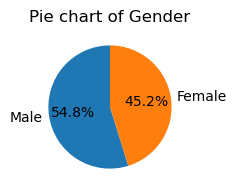

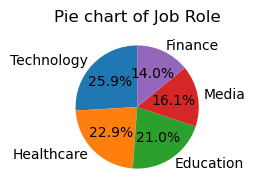

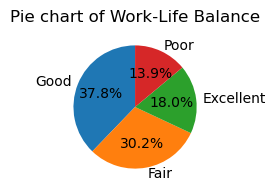

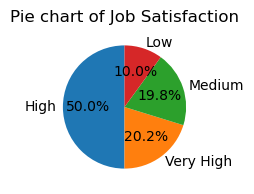

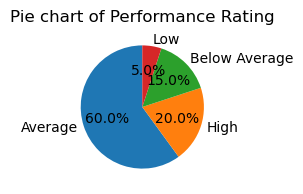

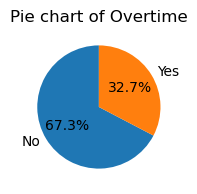

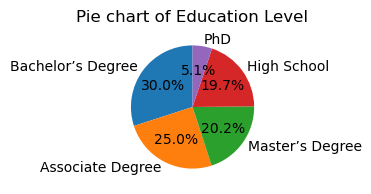

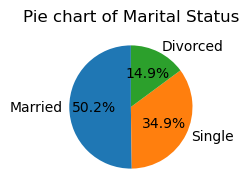

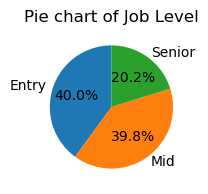

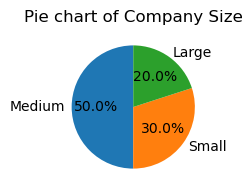

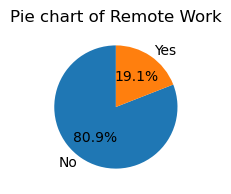

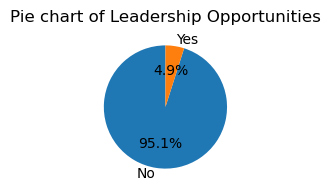

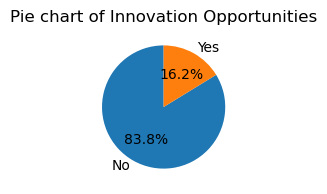

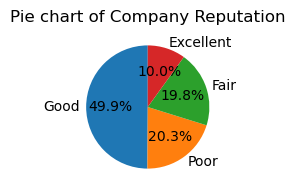

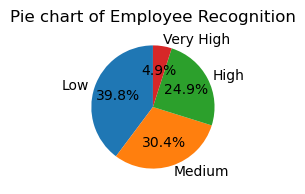

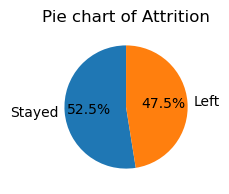

In [8]:
for feature in cat_features:
    plt.figure(figsize=(2, 2))
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Pie chart of {}'.format(feature))
    plt.ylabel('')
    plt.show()

# Multivariate Analysis

1. Correlation Matrix

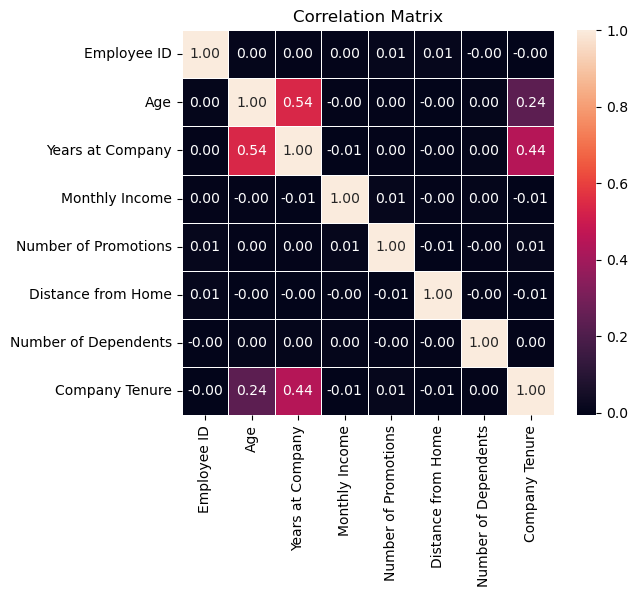

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True,fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

There is a weak positive correlation (0.24) between age and company tenure, which means that employees with a longer tenure tend to be older.

There is a moderate positive correlation (0.54) between age and years at company, which means that employees who are older tend to have been with the company longer. This could be due to a number of factors, such as the company having a long history of promoting from within, or older workers being less likely to leave their jobs.

There is a weak positive correlation (0.20) between number of dependents and company tenure. This could be due to the fact that employees with dependents are more likely to stay with a company for a longer period of time in order to maintain their health insurance and other benefits.

There is a very weak positive correlation (0.01) between monthly income and number of promotions. This suggests that there is no statistically significant relationship between the two variables.

2. Pairplot

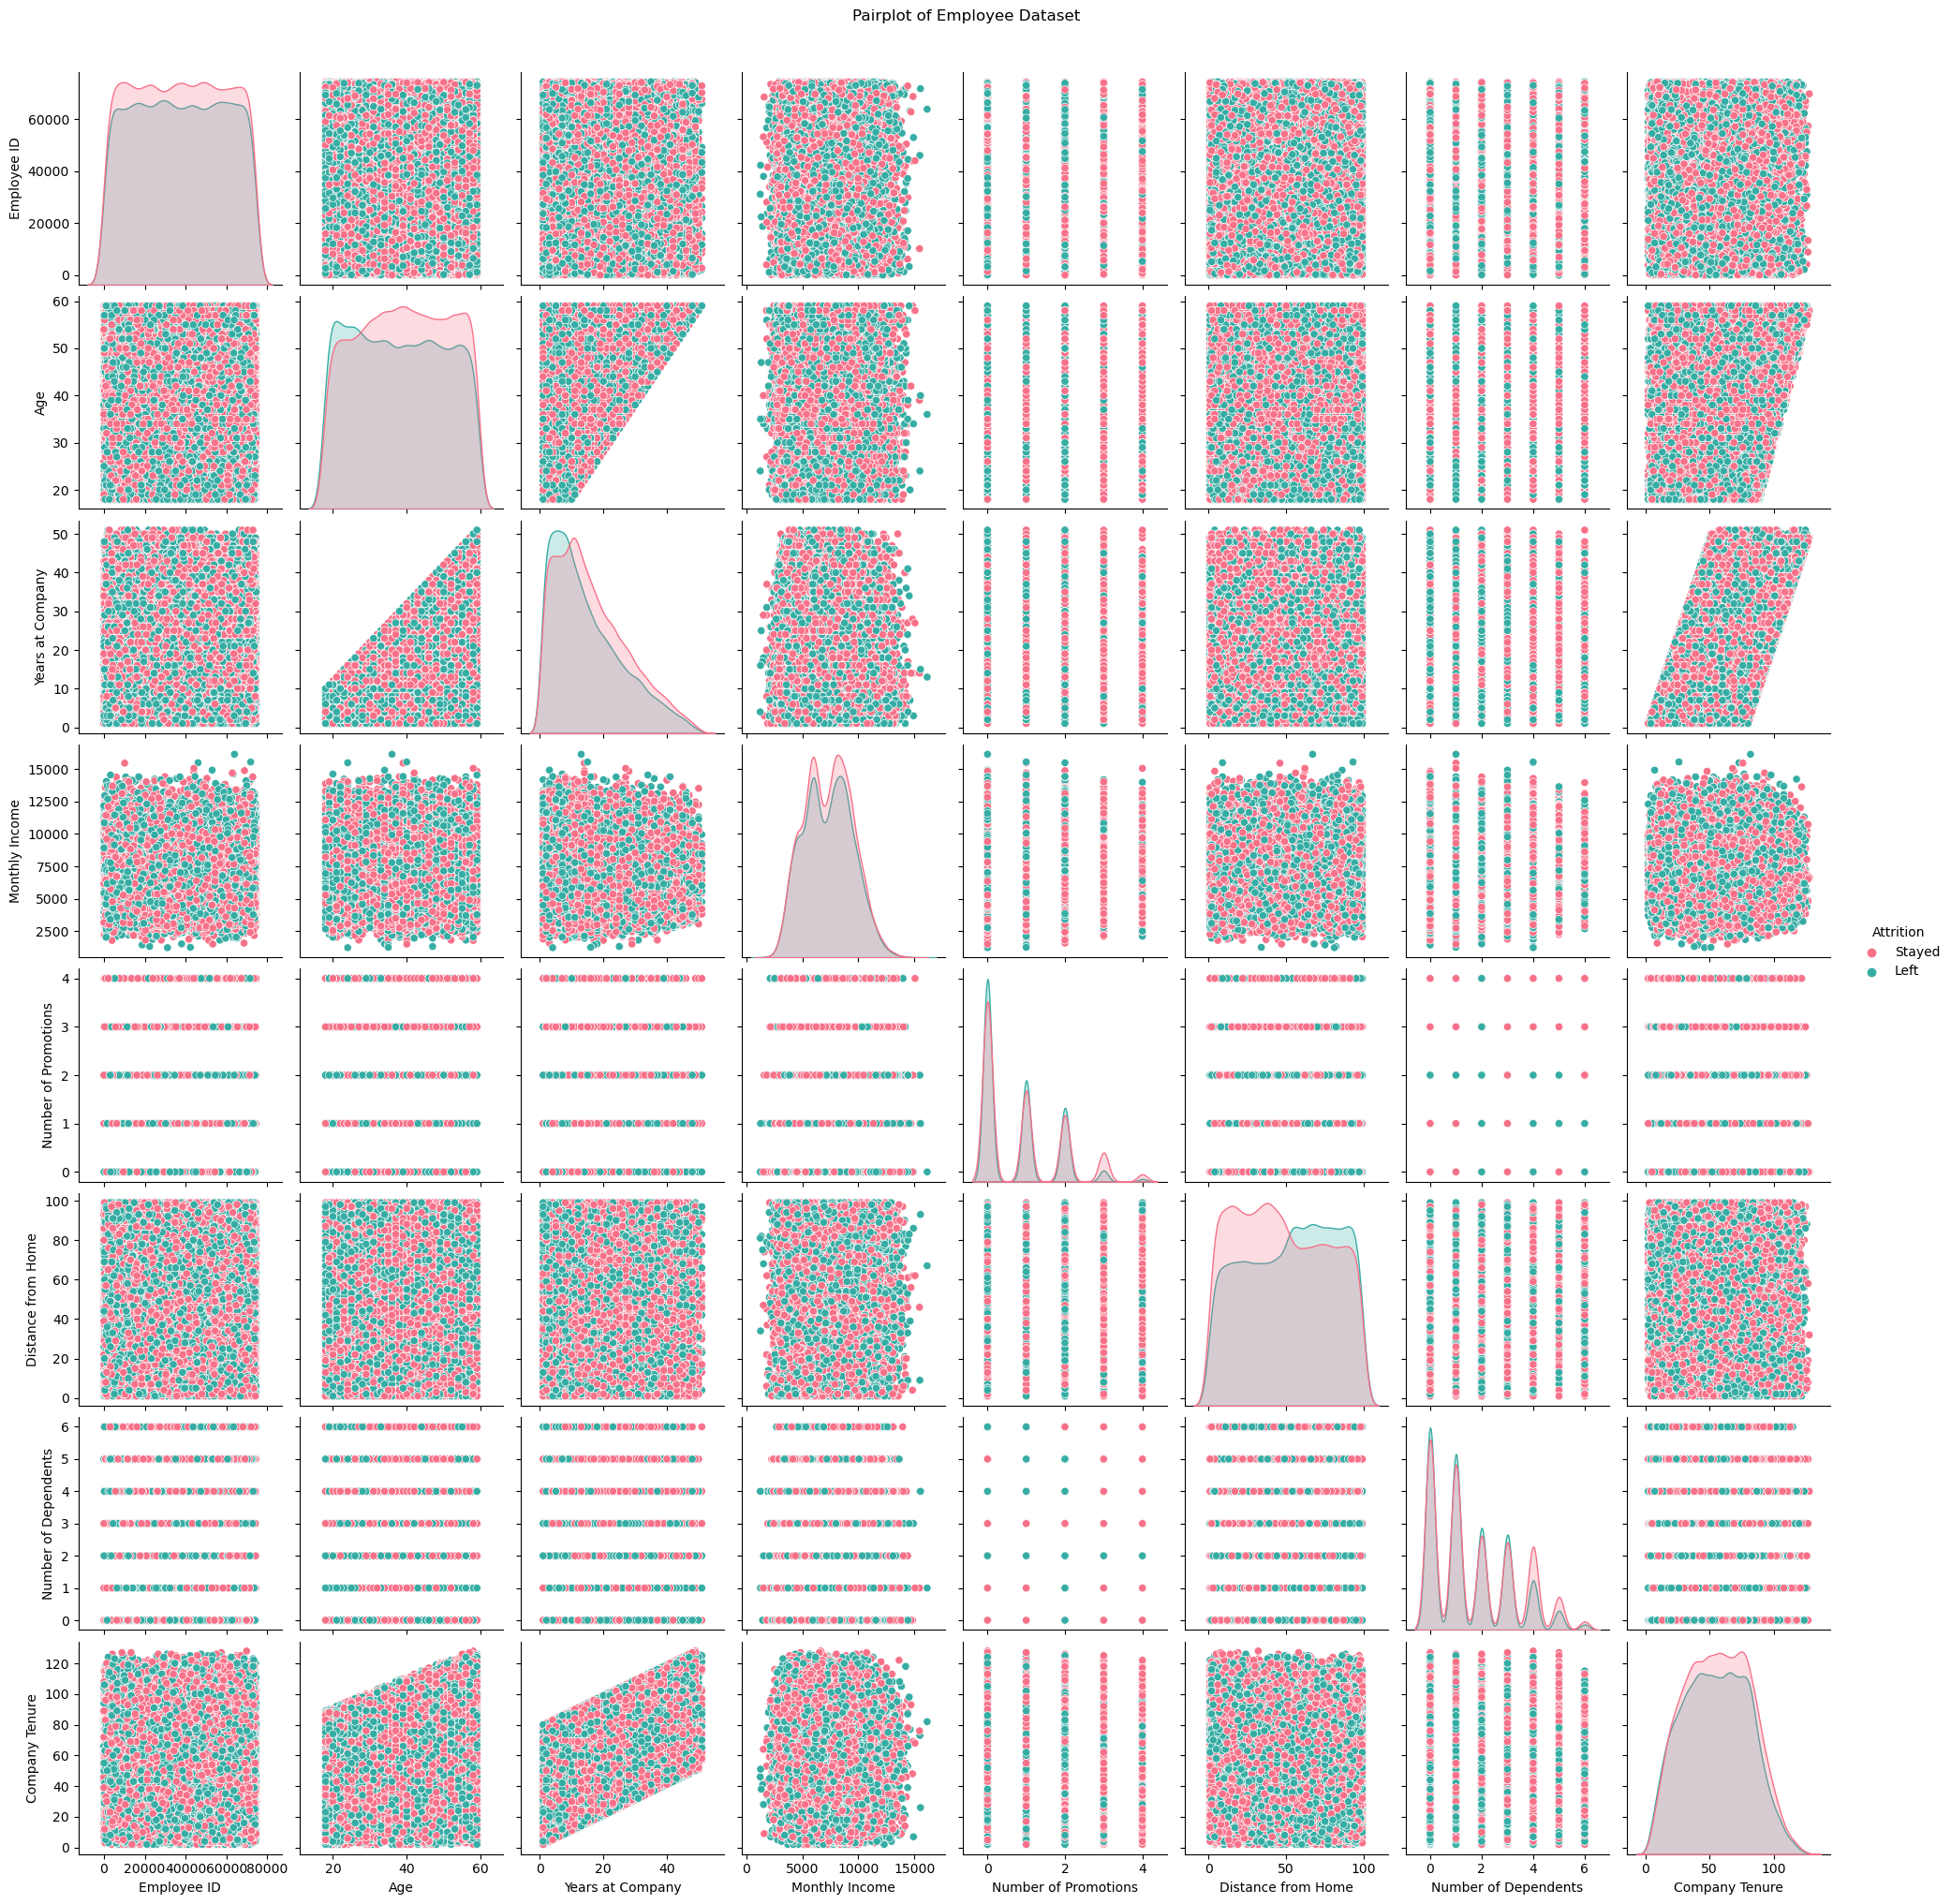

In [10]:
sns.pairplot(df, hue='Attrition', palette='husl')
plt.suptitle('Pairplot of Employee Dataset', y=1.02)
plt.show()

# Preprocessing

In [11]:
# Encoding categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Marital Status'] = le.fit_transform(df['Marital Status'])
df['Job Role'] = le.fit_transform(df['Job Role'])
df['Education'] = le.fit_transform(df['Education Level'])
df['Job Satisfaction'] = le.fit_transform(df['Job Satisfaction'])
df['Performance Rating'] = le.fit_transform(df['Performance Rating'])
df['Attrition'] = le.fit_transform(df['Attrition'])

In [12]:
# Feature selection and scaling
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [13]:
# Select numeric columns to scale
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numeric columns
X_scaled = scaler.fit_transform(df[numeric_cols])

# Convert X_scaled to DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)

# Combine scaled numeric columns with original categorical columns
for col in df.columns:
    if col not in numeric_cols:
        df_scaled[col] = df[col]

# Print the scaled DataFrame
print(df_scaled)

       Employee ID       Age  Years at Company  Monthly Income  \
0        -1.341015 -0.623149          0.292097       -0.887054   
1         1.279032  1.694084         -1.044365       -0.820155   
2        -0.325146 -1.202458         -0.509780        0.399360   
3         1.327159 -0.209358         -0.777072       -1.537927   
4         1.291587  1.445809          2.252240       -1.151399   
...            ...       ...               ...             ...   
74493    -0.976787  1.445809          2.341338        0.246514   
74494     0.461528 -0.705908         -0.064293       -1.599716   
74495    -1.155065  1.114776         -0.955267       -0.764406   
74496    -1.287820 -1.699008         -1.044365       -0.940016   
74497     1.664325  1.694084          2.875922       -1.637811   

       Number of Promotions  Distance from Home  Number of Dependents  \
0                  1.172537           -0.981699             -1.062251   
1                  2.177263           -1.016770              

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeling

In [22]:
# Initializing and training the Decision Tree model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Making predictions
y_pred = dt_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.5180536912751678
Confusion Matrix:
[[3529 3567]
 [3614 4190]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      7096
           1       0.54      0.54      0.54      7804

    accuracy                           0.52     14900
   macro avg       0.52      0.52      0.52     14900
weighted avg       0.52      0.52      0.52     14900

Cross-validation scores: [0.52055369 0.52097315 0.51686242 0.52680594 0.51808038]
Mean CV accuracy: 0.5206551155422143


In [16]:
# Initializing and training the Random Forest model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.56
Confusion Matrix:
[[3706 3390]
 [3166 4638]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      7096
           1       0.58      0.59      0.59      7804

    accuracy                           0.56     14900
   macro avg       0.56      0.56      0.56     14900
weighted avg       0.56      0.56      0.56     14900

Cross-validation scores: [0.56602349 0.55880872 0.55872483 0.5603658  0.55961071]
Mean CV accuracy: 0.5607067110152365


In [19]:
# Save the trained model
import pickle
model_filename = 'best_rf_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_classifier, file)
print(f"Model saved as {model_filename}")

# Load the saved model
with open(model_filename, 'rb') as file:
    loaded_rf_classifier = pickle.load(file)
print("Model loaded successfully")

# Making predictions with the loaded model
y_pred = loaded_rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(loaded_rf_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Model saved as best_rf_model.pkl
Model loaded successfully
Accuracy: 0.56
Confusion Matrix:
[[3706 3390]
 [3166 4638]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      7096
           1       0.58      0.59      0.59      7804

    accuracy                           0.56     14900
   macro avg       0.56      0.56      0.56     14900
weighted avg       0.56      0.56      0.56     14900

Cross-validation scores: [0.56333893 0.56090604 0.55788591 0.55734541 0.56967866]
Mean CV accuracy: 0.5618309903368994


This workflow ensures that the trained model(best model used is Random Forest classification) can be saved and reloaded later for making predictions without needing to retrain it, thereby saving time and computational resources.